# Öğrencilerin Mental Sağlıkları

In [1]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [11]:
!pip install researchpy

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler


from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor

from warnings import filterwarnings
filterwarnings('ignore')

from datetime import datetime

In [13]:
import researchpy as rp

Veri analizi için gerekli kütüphanelerimizi ekledik

In [20]:
ad = pd.read_csv("data.csv")
df = ad.copy()

## 1. Veriye ilk bakış

Veri analizi yapacağımız verisetini import ettik.

In [21]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [22]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Veri setimizdeki ilk 5 veri.

In [23]:
df.tail()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


Veri setimizdeki son 5 veri.

In [24]:
df=df.drop(["Timestamp","What is your CGPA?","Marital status","What is your course?","Your current year of Study"], axis = 1)
df.head()

,Choose your gender,Age,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Yes,No,Yes,No
1,Male,21.0,No,Yes,No,No
2,Male,19.0,Yes,Yes,Yes,No
3,Female,22.0,Yes,No,No,No
4,Male,23.0,No,No,No,No


Veri setimizde bulunan birkaç sütununu veri analizinde kullanmayacağımız için çıkardık.

In [25]:
df = df.rename(columns={'Choose your gender': 'Sex', 
                        'Do you have Depression?': 'Depression',
                        'Do you have Anxiety?': 'Anxiety',
                        'Do you have Panic attack?': 'Panic_attack',
                        'Did you seek any specialist for a treatment?': 'specialist'
                       })
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           101 non-null    object 
 1   Age           100 non-null    float64
 2   Depression    101 non-null    object 
 3   Anxiety       101 non-null    object 
 4   Panic_attack  101 non-null    object 
 5   specialist    101 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB


,Sex,Age,Depression,Anxiety,Panic_attack,specialist
0,Female,18.0,Yes,No,Yes,No
1,Male,21.0,No,Yes,No,No
2,Male,19.0,Yes,Yes,Yes,No
3,Female,22.0,Yes,No,No,No
4,Male,23.0,No,No,No,No


Verisetimizde bulunan sütunlarımızın isimlerini düzenledik.

## 2. Veri Setinin Betimlenmesi

In [26]:
df.Sex = pd.Categorical(df.Sex)
df.Depression = pd.Categorical(df.Depression)
df.Anxiety = pd.Categorical(df.Anxiety)
df.Panic_attack = pd.Categorical(df.Panic_attack)
df.specialist = pd.Categorical(df.specialist)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sex           101 non-null    category
 1   Age           100 non-null    float64 
 2   Depression    101 non-null    category
 3   Anxiety       101 non-null    category
 4   Panic_attack  101 non-null    category
 5   specialist    101 non-null    category
dtypes: category(5), float64(1)
memory usage: 2.0 KB


In [27]:
rp.summary_cont(df[["Age"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,100.0,20.53,2.4963,0.2496,20.0347,21.0253


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


In [29]:
rp.summary_cat(df[["Sex","Depression","Anxiety","Panic_attack","specialist"]])

,Variable,Outcome,Count,Percent
0,Sex,Female,75,74.26
1,,Male,26,25.74
2,Depression,No,66,65.35
3,,Yes,35,34.65
4,Anxiety,No,67,66.34
5,,Yes,34,33.66
6,Panic_attack,No,68,67.33
7,,Yes,33,32.67
8,specialist,No,95,94.06
9,,Yes,6,5.94


### 2.1 Cinsiyet Verileri

In [30]:
df.Sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [31]:
df["Sex"].value_counts()

Female    75
Male      26
Name: Sex, dtype: int64

<AxesSubplot:>

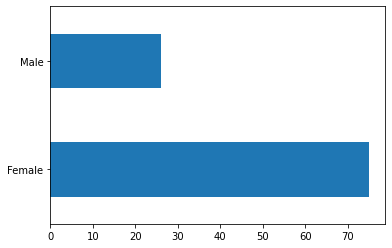

In [32]:
df["Sex"].value_counts().plot.barh()

### 2.6 Depresyon

In [33]:
df.Depression.unique()

['Yes', 'No']
Categories (2, object): ['Yes', 'No']

<AxesSubplot:>

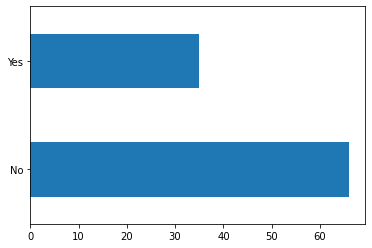

In [34]:
df["Depression"].value_counts().plot.barh()

### 2.7 Anksiyete

In [35]:
df.Anxiety.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

<AxesSubplot:>

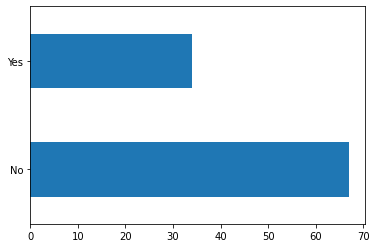

In [36]:
df["Anxiety"].value_counts().plot.barh()

### 2.9 Panik Atak

In [37]:
df.Panic_attack.unique()

['Yes', 'No']
Categories (2, object): ['Yes', 'No']

<AxesSubplot:>

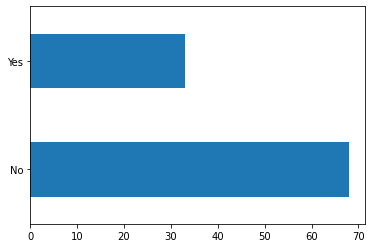

In [38]:
df["Panic_attack"].value_counts().plot.barh()

### 2.10 Hiç Uzmana Başvurdunuz mu?

In [39]:
df.specialist.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

<AxesSubplot:>

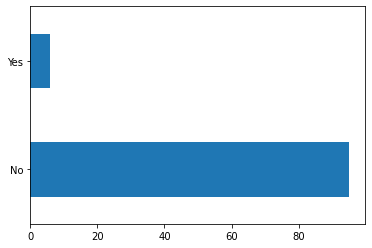

In [40]:
df["specialist"].value_counts().plot.barh()

In [41]:
df.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


## 3. Eksik Değerlerin İncelenmesi

In [42]:
df.isnull().sum()

Sex             0
Age             1
Depression      0
Anxiety         0
Panic_attack    0
specialist      0
dtype: int64

In [43]:
df["Age"].fillna(df.Age.median(), inplace = True)

In [44]:
df.isnull().sum()

Sex             0
Age             0
Depression      0
Anxiety         0
Panic_attack    0
specialist      0
dtype: int64

## 4. Kategorik Değişken Özetleri

In [45]:
katdf = df.select_dtypes(include = ["category"])

In [46]:
katdf.head()

,Sex,Depression,Anxiety,Panic_attack,specialist
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,Yes,Yes,Yes,No
3,Female,Yes,No,No,No
4,Male,No,No,No,No


In [47]:
katdf.Depression.unique()

['Yes', 'No']
Categories (2, object): ['Yes', 'No']

In [48]:
katdf["Sex"].value_counts()

Female    75
Male      26
Name: Sex, dtype: int64

In [49]:
katdf["Depression"].value_counts()

No     66
Yes    35
Name: Depression, dtype: int64

In [50]:
katdf["Anxiety"].value_counts()

No     67
Yes    34
Name: Anxiety, dtype: int64

In [51]:
katdf["Panic_attack"].value_counts()

No     68
Yes    33
Name: Panic_attack, dtype: int64

In [52]:
katdf["specialist"].value_counts()

No     95
Yes     6
Name: specialist, dtype: int64

<AxesSubplot:xlabel='Depression'>

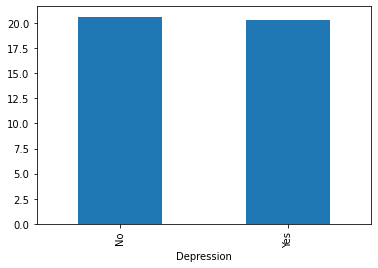

In [56]:
df[["Depression","Age"]].groupby("Depression")["Age"].mean().plot(kind="bar")

In [57]:
df.head()

,Sex,Age,Depression,Anxiety,Panic_attack,specialist
0,Female,18.0,Yes,No,Yes,No
1,Male,21.0,No,Yes,No,No
2,Male,19.0,Yes,Yes,Yes,No
3,Female,22.0,Yes,No,No,No
4,Male,23.0,No,No,No,No


#  5. Değişken Dönüşümü

In [61]:
dms=pd.get_dummies(df, columns = ["Sex","Depression","Anxiety","Panic_attack","specialist"], prefix = ["Sex","Depression","Anxiety","Panic_attack","specialist"]).head()

In [62]:
dms

,Age,Sex_Female,Sex_Male,Depression_No,Depression_Yes,Anxiety_No,Anxiety_Yes,Panic_attack_No,Panic_attack_Yes,specialist_No,specialist_Yes
0,18.0,1,0,0,1,1,0,0,1,1,0
1,21.0,0,1,1,0,0,1,1,0,1,0
2,19.0,0,1,0,1,0,1,0,1,1,0
3,22.0,1,0,0,1,1,0,1,0,1,0
4,23.0,0,1,1,0,1,0,1,0,1,0


## K En Yakın Komşu (KNN)

In [63]:
dfknn=df.copy()

In [64]:
dms = pd.get_dummies(dfknn[['Sex','Depression', 'Anxiety','Panic_attack','specialist']])

In [65]:
y = dfknn["Age"]

In [66]:
dms.head()

,Sex_Female,Sex_Male,Depression_No,Depression_Yes,Anxiety_No,Anxiety_Yes,Panic_attack_No,Panic_attack_Yes,specialist_No,specialist_Yes
0,1,0,0,1,1,0,0,1,1,0
1,0,1,1,0,0,1,1,0,1,0
2,0,1,0,1,0,1,0,1,1,0
3,1,0,0,1,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0


In [70]:
X_ = dfknn.drop(['Sex','Depression', 'Anxiety','Panic_attack','specialist'], axis=1).astype('float64')

In [71]:
X = pd.concat([X_, dms[['Sex_Female','Depression_No','Anxiety_No','Panic_attack_No','specialist_No']]], axis=1)

In [72]:
X.head()

,Age,Sex_Female,Depression_No,Anxiety_No,Panic_attack_No,specialist_No
0,18.0,1,0,1,0,1
1,21.0,0,1,0,1,1
2,19.0,0,0,0,0,1
3,22.0,1,0,1,1,1
4,23.0,0,1,1,1,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [74]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

#### Tahmin


In [75]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

test hatası: 0.26890089681459267
k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.12909944487358055
k = 3 için RMSE değeri:  0.20367003088692595
k = 4 için RMSE değeri:  0.24324199198877375
k = 5 için RMSE değeri:  0.22744962812309288
k = 6 için RMSE değeri:  0.21688023662159045
k = 7 için RMSE değeri:  0.22797541340163419
k = 8 için RMSE değeri:  0.258602010819715
k = 9 için RMSE değeri:  0.2730712383876553
k = 10 için RMSE değeri:  0.26708300832013476


#### Model Tuning

In [76]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [77]:
knn_cv_model.best_params_["n_neighbors"]

6

In [78]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  0.2638993314558738
k = 2 için RMSE değeri:  0.12909944487358055 RMSE_CV değeri:  0.2912411862553587
k = 3 için RMSE değeri:  0.20367003088692595 RMSE_CV değeri:  0.29647398772375516
k = 4 için RMSE değeri:  0.24324199198877375 RMSE_CV değeri:  0.28484801711990704
k = 5 için RMSE değeri:  0.22744962812309288 RMSE_CV değeri:  0.26172504656604767
k = 6 için RMSE değeri:  0.21688023662159045 RMSE_CV değeri:  0.2685572860173705
k = 7 için RMSE değeri:  0.22797541340163419 RMSE_CV değeri:  0.2832804501039181
k = 8 için RMSE değeri:  0.258602010819715 RMSE_CV değeri:  0.2823885684149211
k = 9 için RMSE değeri:  0.2730712383876553 RMSE_CV değeri:  0.29784647395236213
k = 10 için RMSE değeri:  0.26708300832013476 RMSE_CV değeri:  0.3120210615601817


In [79]:
knn_tuned = KNeighborsRegressor(n_neighbors =8)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.26059288909360867

In [80]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [81]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.21433658329872413

## Destek Vektör Regresyonu (SVR)


In [97]:
dfsvr=df.copy()
dfsvr = dfsvr.dropna()
dfsvr.head()

,Sex,Age,Depression,Anxiety,Panic_attack,specialist
0,Female,18.0,Yes,No,Yes,No
1,Male,21.0,No,Yes,No,No
2,Male,19.0,Yes,Yes,Yes,No
3,Female,22.0,Yes,No,No,No
4,Male,23.0,No,No,No,No


In [98]:
dms = pd.get_dummies(dfsvr[['Sex','Depression', 'Anxiety','Panic_attack','specialist']])
dms.head()

,Sex_Female,Sex_Male,Depression_No,Depression_Yes,Anxiety_No,Anxiety_Yes,Panic_attack_No,Panic_attack_Yes,specialist_No,specialist_Yes
0,1,0,0,1,1,0,0,1,1,0
1,0,1,1,0,0,1,1,0,1,0
2,0,1,0,1,0,1,0,1,1,0
3,1,0,0,1,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0


In [99]:
y = dfsvr["Age"]

In [100]:
X_ = dfsvr.drop(['Age','Sex','Depression', 'Anxiety','Panic_attack','specialist'], axis=1).astype('float64')

In [101]:
X = pd.concat([X_, dms[['Sex_Female','Depression_No','Anxiety_No','Panic_attack_No','specialist_No']]], axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [103]:
X_train = pd.DataFrame(X_train["Age"])
X_test = pd.DataFrame(X_test["Age"])
svr_model = LinearSVR().fit(X_train, y_train)

KeyError: 'Age'

In [88]:
svr_model = LinearSVR().fit(X_train, y_train)
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [89]:
svr_model.predict(X_train)[0:5]

array([24.        , 19.00100391, 18.00161788, 21.00053865, 24.00010615])

In [90]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0])) 

y = 0.0050279430999629945 + 0.9998204492727009 x


In [92]:
X_train["Age"][0:1]

40    24.0
Name: Age, dtype: float64

In [93]:
15.00599933805698 + 2.996027299353797 *1

18.00202663741078

In [94]:
y_pred = svr_model.predict(X_train)

ValueError: x and y must be the same size

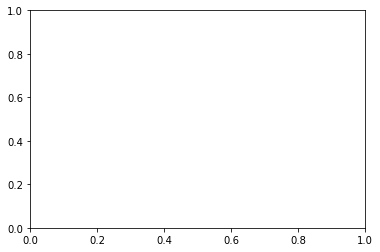

In [149]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")